# Trying to use the openvino models for this project
using the following models:
- [text-detection-0003](https://docs.openvinotoolkit.org/latest/omz_models_model_text_detection_0003.html)
- [text-recognition=0012](https://docs.openvinotoolkit.org/latest/omz_models_model_text_recognition_0012.html)

In [1]:
# Standard imports
import cv2
import numpy as np
from utils.opv import OpvModel  # to use the openvino models
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the text-recognition model
recognizer = OpvModel("text-recognition-0012", device="CPU", fp="FP32", debug=True, ncs=1)

F:\Programming\bootcamp\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[INFO] Model text-recognition-0012 Loaded and Ready on NCS device 1


F:\Programming\bootcamp\Final-Project\cv-bootcamp-project\utils\opv.py:86: DeprecationWarning: 'inputs' property of IENetwork class is deprecated. To access DataPtrs user need to use 'input_data' property of InputInfoPtr objects which can be accessed by 'input_info' property.
  self.input_layer = next(iter(net.inputs))


In [3]:
# as OpvModel was not working with text-detection-0003 using cv2.dnn
def load_model(model_name, fp='FP32'):
    model_path = f"models/{model_name}/{fp}/{model_name}"
    return cv2.dnn.readNet(model_path+'.bin', model_path+'.xml')

detector = load_model('text-detection-0003')

## Trying to use the text-detection-0003 Model

(1080, 1920, 3)


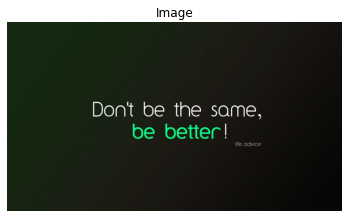

In [5]:
image = cv2.imread("./images/text3.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(img.shape)

plt.imshow(image)
plt.axis('off')
plt.title('Image');

In [7]:
image_blob = cv2.dnn.blobFromImage(image, size=(768, 1280))  # (1,3,768,1280)
detector.setInput(image_blob)  # passing the image to the model
out = detector.forward()  # predicting

In [8]:
out.shape

(1, 2, 320, 192)

**TODO**: lean what does this mean "name: "model/segm\_logits/add", shape: [1x2x192x320] - logits related to text/no-text classification for each pixel."

## Trying the text-recognition-0012 model

(1080, 1920, 3)


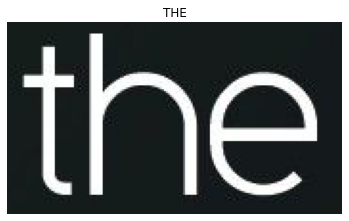

In [9]:
image = cv2.imread("./images/text3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

# cv2.rectangle(canvas, (950, 450), (1125, 550), (255, 0, 0), 3, 1)  # to find the roi
roi = image[450:550, 950:1125]
plt.imshow(roi)
plt.axis('off')
plt.title('THE');

In [11]:
roi_gray_resized = cv2.resize(cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY), (120, 32))
roi_reshaped = np.reshape(roi_gray_resized, (32, 120, 1))

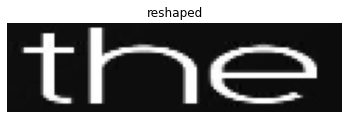

In [12]:
plt.imshow(roi_reshaped, cmap='gray')
plt.axis('off')
plt.title('reshaped');

In [13]:
prediction = recognizer.Predict(roi_reshaped)

In [15]:
characters = '0123456789abcdefghijklmnopqrstuvwxyz#'

for p in prediction:
    print(characters[np.argmax(p[0])], end='')

tt#######hh#############e#####

the above output is the, but figure out how to convert the output

**TODO**: figure out how to decode " confidence distribution across alphanumeric symbols: "0123456789abcdefghijklmnopqrstuvwxyz#", where # - special blank character for CTC decoding algorithm."